In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data = pd.read_csv('../data/data.csv')
data = data.fillna(0)
data.head(20)

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,0.000000,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,0.000000,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,0.000000,0.000000,0.000000,0.000000e+00,0.0,19.0,0.42,False
5,P1,P,1,-0.001502,0.000000,-0.001502,2.000000e+07,1.0,19.0,0.42,False
6,P2,P,1,-0.001747,0.000000,-0.001747,2.000000e+07,1.0,19.0,0.42,False
7,I1,I,1,0.000000,0.002533,0.002533,4.024292e+07,1.0,19.0,0.42,False
8,I2,I,1,0.000000,0.001267,0.001267,3.666387e+07,1.0,19.0,0.42,False
9,I3,I,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,19.0,0.42,False


In [120]:
well_meta = pd.read_csv('../data/meta.csv')
well_meta['group'] = well_meta.cat.apply(lambda x: x[0])
well_meta.head()

,cat,x,y,group
0,P1,190,190,P
1,P2,190,890,P
2,I1,890,190,I
3,I2,590,770,I
4,I3,670,510,I


In [121]:
well_meta[well_meta.cat == 'P1'].x.values[0]

190

In [122]:
data['x'] = data.cat.apply(lambda x: well_meta[well_meta.cat == x].x.values[0])
data['y'] = data.cat.apply(lambda x: well_meta[well_meta.cat == x].y.values[0])

data

KeyboardInterrupt: 

For baseline, I'll use plain XGBoost with default parameters. 

In [ ]:
import xgboost as xgb

In [ ]:
p_data = data[data.group == 'P']
i_data = data[data.group == 'I']

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
for idx in p_data.index:
    if idx % 2000 == 0:
        print(idx)
    date, start_lag, coef = p_data.loc[idx, ['date', 'start_lag', 'coef']]
    i1_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I1')]
    
    i2_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I2')]
    
    i3_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I3')]
    
    for col in i1_row.columns:
        p_data.loc[idx, f'i1_{col}'] = i1_row[col].values[0]
        p_data.loc[idx, f'i2_{col}'] = i2_row[col].values[0]
        
        if len(i3_row) > 0:
            p_data.loc[idx, f'i3_{col}'] = i3_row[col].values[0]

p_data = p_data.fillna(0)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000


In [ ]:
p_data

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,...,i3_coef,i1_is_base,i2_is_base,i3_is_base,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,...,0.42,False,False,False,890.0,590.0,670.0,190.0,770.0,510.0
1,P2,P,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,...,0.42,False,False,False,890.0,590.0,670.0,190.0,770.0,510.0
5,P1,P,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,...,0.42,False,False,False,890.0,590.0,670.0,190.0,770.0,510.0
6,P2,P,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,...,0.42,False,False,False,890.0,590.0,670.0,190.0,770.0,510.0
10,P1,P,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,...,0.42,False,False,False,890.0,590.0,670.0,190.0,770.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28909,P2,P,27,-0.000251,-0.001899,-0.002150,20000000.0,1.0,0.0,0.00,...,0.00,True,True,0,890.0,590.0,0.0,190.0,770.0,0.0
28912,P1,P,28,-0.000359,-0.001302,-0.001661,20000000.0,1.0,0.0,0.00,...,0.00,True,True,0,890.0,590.0,0.0,190.0,770.0,0.0
28913,P2,P,28,-0.000240,-0.001902,-0.002143,20000000.0,1.0,0.0,0.00,...,0.00,True,True,0,890.0,590.0,0.0,190.0,770.0,0.0
28916,P1,P,29,-0.000345,-0.001319,-0.001665,20000000.0,1.0,0.0,0.00,...,0.00,True,True,0,890.0,590.0,0.0,190.0,770.0,0.0


In [ ]:
p_data[p_data.i1_status == 0].shape, p_data[p_data.i2_status == 0].shape

((0, 52), (0, 52))

In [ ]:
p_data.columns

Index(['cat', 'group', 'date', 'oil', 'water', 'liquid', 'bhp', 'status',
       'start_lag', 'coef', 'is_base', 'x', 'y', 'i1_cat', 'i2_cat', 'i3_cat',
       'i1_group', 'i2_group', 'i3_group', 'i1_date', 'i2_date', 'i3_date',
       'i1_oil', 'i2_oil', 'i3_oil', 'i1_water', 'i2_water', 'i3_water',
       'i1_liquid', 'i2_liquid', 'i3_liquid', 'i1_bhp', 'i2_bhp', 'i3_bhp',
       'i1_status', 'i2_status', 'i3_status', 'i1_start_lag', 'i2_start_lag',
       'i3_start_lag', 'i1_coef', 'i2_coef', 'i3_coef', 'i1_is_base',
       'i2_is_base', 'i3_is_base', 'i1_x', 'i2_x', 'i3_x', 'i1_y', 'i2_y',
       'i3_y'],
      dtype='object')

In [ ]:
p_data_ = p_data.drop(['i1_cat', 'i2_cat', 'i3_cat', 
                       'i1_group', 'i2_group', 'i3_group',
                       'i1_date', 'i2_date', 'i3_date',
                       'i1_start_lag', 'i2_start_lag', 'i3_start_lag',
                       'i1_coef', 'i2_coef', 'i3_coef',
                       'i1_oil', 'i2_oil', 'i3_oil',
                       'i1_liquid', 'i2_liquid', 'i3_liquid',
                       'i1_status', 'i2_status', 
                       'i1_is_base', 'i2_is_base', 'i3_is_base',
                       'cat', 'group'], axis=1)

p_data_

,date,oil,water,liquid,bhp,status,start_lag,coef,is_base,x,...,i1_bhp,i2_bhp,i3_bhp,i3_status,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,False,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
1,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,False,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
5,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,False,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
6,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,False,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
10,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,False,190,...,4.058030e+07,3.689916e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28909,27,-0.000251,-0.001899,-0.002150,20000000.0,1.0,0.0,0.00,True,190,...,3.309469e+07,2.961056e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
28912,28,-0.000359,-0.001302,-0.001661,20000000.0,1.0,0.0,0.00,True,190,...,3.294920e+07,2.947955e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
28913,28,-0.000240,-0.001902,-0.002143,20000000.0,1.0,0.0,0.00,True,190,...,3.294920e+07,2.947955e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
28916,29,-0.000345,-0.001319,-0.001665,20000000.0,1.0,0.0,0.00,True,190,...,3.281453e+07,2.935853e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0


In [123]:
not_baseline = p_data_[~p_data_.is_base].drop('is_base', axis=1)
not_baseline

,date,oil,water,liquid,bhp,status,start_lag,coef,x,y,...,i1_bhp,i2_bhp,i3_bhp,i3_status,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,190,190,...,4.018987e+07,3.665494e+07,0.000000e+00,0.0,890.0,590.0,670.0,190.0,770.0,510.0
1,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,190,890,...,4.018987e+07,3.665494e+07,0.000000e+00,0.0,890.0,590.0,670.0,190.0,770.0,510.0
5,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,190,190,...,4.024292e+07,3.666387e+07,0.000000e+00,0.0,890.0,590.0,670.0,190.0,770.0,510.0
6,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,190,890,...,4.024292e+07,3.666387e+07,0.000000e+00,0.0,890.0,590.0,670.0,190.0,770.0,510.0
10,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,190,190,...,4.058030e+07,3.689916e+07,0.000000e+00,0.0,890.0,590.0,670.0,190.0,770.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28786,27,-0.000256,-0.002069,-0.002326,20000000.0,1.0,9.0,0.08,190,890,...,3.359148e+07,3.007493e+07,2.846977e+07,1.0,890.0,590.0,670.0,190.0,770.0,510.0
28790,28,-0.000364,-0.001428,-0.001792,20000000.0,1.0,9.0,0.08,190,190,...,3.343621e+07,2.993461e+07,2.832448e+07,1.0,890.0,590.0,670.0,190.0,770.0,510.0
28791,28,-0.000245,-0.002073,-0.002318,20000000.0,1.0,9.0,0.08,190,890,...,3.343621e+07,2.993461e+07,2.832448e+07,1.0,890.0,590.0,670.0,190.0,770.0,510.0
28795,29,-0.000350,-0.001447,-0.001797,20000000.0,1.0,9.0,0.08,190,190,...,3.329215e+07,2.980460e+07,2.818985e+07,1.0,890.0,590.0,670.0,190.0,770.0,510.0


In [ ]:
not_baseline.columns

Index(['date', 'oil', 'water', 'liquid', 'bhp', 'status', 'start_lag', 'coef',
       'x', 'y', 'i1_water', 'i2_water', 'i3_water', 'i1_bhp', 'i2_bhp',
       'i3_bhp', 'i3_status', 'i1_x', 'i2_x', 'i3_x', 'i1_y', 'i2_y', 'i3_y'],
      dtype='object')

60 rows baseline

In [124]:
from sklearn.model_selection import TimeSeriesSplit
 
tscv = TimeSeriesSplit(n_splits=5)

X = not_baseline.drop(['oil', 'water', 'liquid'], axis=1)
y = not_baseline[['oil']]

X.shape, y.shape

((11520, 20), (11520, 1))

In [ ]:
X.columns

Index(['date', 'bhp', 'status', 'start_lag', 'coef', 'x', 'y', 'i1_water',
       'i2_water', 'i3_water', 'i1_bhp', 'i2_bhp', 'i3_bhp', 'i3_status',
       'i1_x', 'i2_x', 'i3_x', 'i1_y', 'i2_y', 'i3_y'],
      dtype='object')

In [140]:
from sklearn.metrics import mean_absolute_percentage_error

for i, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    xgbr = xgb.XGBRegressor(random_state=42)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

    xgbr.fit(X_train, y_train)
    y_pred = xgbr.predict(X_test)
    print(f'{i=}, ', mean_absolute_percentage_error(y_test, y_pred) * 100, '%')

i=1,  8.466013875639472 %
i=2,  8.730420342054481 %
i=3,  7.23540084091875 %
i=4,  6.430790916075216 %
i=5,  5.426237430267132 %


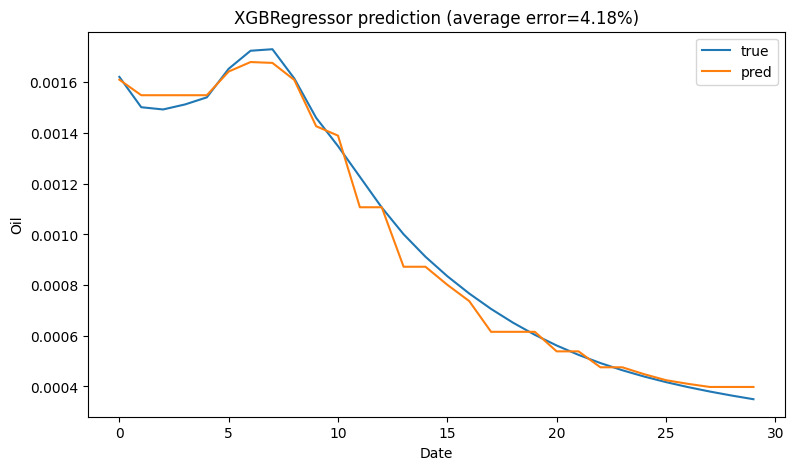

In [145]:
X_sample = X[X.y == 190].iloc[-30:]
y_sample = y[X.y == 190].iloc[-30:]

y_pred = xgbr.predict(X_sample)

plt.figure(figsize=(9, 5))
plt.plot(X_sample.date, - y_sample.values, label='true')
plt.plot(X_sample.date, - y_pred, label='pred')

plt.title(f'XGBRegressor prediction (average error=\
{mean_absolute_percentage_error(y_sample.values, y_pred) * 100:.2f}%)')
          
plt.xlabel('Date')
plt.ylabel('Oil')
plt.legend()
plt.show()